<a href="https://colab.research.google.com/github/lcbjuk/IBMEC/blob/master/IBMEC5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regressao Linear**



In [10]:
import pandas as pd
nts = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/notas%20-%20ok.csv')
nts

from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(nts[['AP1','AP2']] , nts['AP3'])
print(reglin.coef_, reglin.intercept_)

def prever_ap3(ap1, ap2):
  ap3 = ap1 * -0.366 + ap2 * 1.383 - 0.825
  return ap3

print(prever_ap3(8,8))
print(prever_ap3(2,4))
print(prever_ap3(3.5,8))

[-0.36608176  1.38338992] -0.8257714929014783
7.310999999999999
3.9749999999999996
8.958


In [11]:
ap1_ap2_futuras = pd.DataFrame({
    'AP1':[8,2,3.5],
    'AP2':[8,4,8]
})
ap3_futuras = reglin.predict(ap1_ap2_futuras)
ap3_futuras

array([7.31269382, 3.97562468, 8.96006172])

In [12]:

r2 = reglin.score(nts[['AP1','AP2']] , nts['AP3'])
r2

0.9818896713333346

In [13]:
ap3_prev = reglin.predict(nts[['AP1','AP2']])

from sklearn import metrics
rr = metrics.r2_score(nts['AP3'] , ap3_prev)
rr

0.9818896713333346

In [14]:
err_quad = metrics.mean_squared_error(nts['AP3'] , ap3_prev) 
err_quad

import numpy as np
err = np.sqrt(err_quad)
err


0.38145674290172166

In [15]:
import statsmodels.api as sm

nts[['AP1','AP2']]

ap1_ap2 = sm.add_constant(nts[['AP1','AP2']])
ap1_ap2

rl = sm.OLS(nts['AP3'] , ap1_ap2).fit()
rl.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AP3   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1003.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           5.91e-33
Time:                        17:10:28   Log-Likelihood:                -18.207
No. Observations:                  40   AIC:                             42.41
Df Residuals:                      37   BIC:                             47.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8258      0.265     -3.111      0.004      -1.364      -0.288
AP1           -0.3661      0.030    -12.318      0.000      -0.426      -0.306
AP2            1.3834      0.031     44.788      0.000       1.321       1.446
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.534
Skew:                           0.642   Prob(JB):                        0.171
Kurtosis:                       2.314   Cond. No.                         43.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

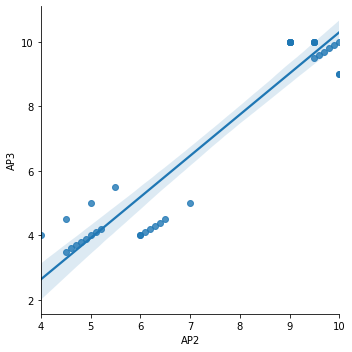

In [16]:
import seaborn as sns
sns.lmplot('AP2' , 'AP3' , data=nts)


In [17]:
nts.corr()

,AP1,AP2,AP3,Final
AP1,1.000000,0.278632,0.003717,0.630113
AP2,0.278632,1.000000,0.952691,0.920175
AP3,0.003717,0.952691,1.000000,0.776387
Final,0.630113,0.920175,0.776387,1.000000


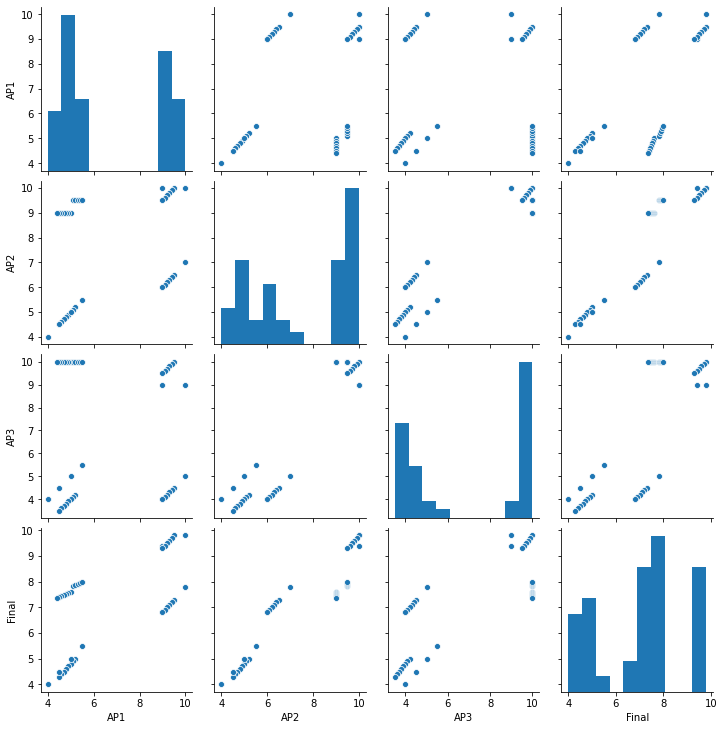

In [18]:
sns.pairplot(nts)


**[Exercicios] Regressao Linear**


[-0.01783154] 6.303900300544503


array([4.34243043, 4.52074588, 4.69906132, 4.87737676, 5.0556922 ,
       5.23400765])

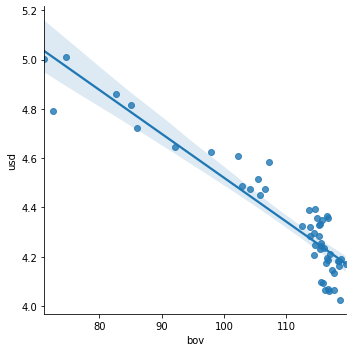

In [19]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/usd_ibov_20%20-%2020.csv')
dados.head()

import seaborn as sns
sns.lmplot('bov','usd',data=dados)

from sklearn.linear_model import LinearRegression

rl = LinearRegression()

rl.fit(dados[['bov']] , dados['usd'])
print(rl.coef_,rl.intercept_)

ibov_fut = pd.DataFrame({'ibov':[110,100,90,80,70,60]})
rl.predict(ibov_fut)